<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW11_zGermain/TESSlightcurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part of the homework, you will download 3 time series that were produced by TESS. The format of the data is given in two columns: Time (BJD = Barycentric Julian Date, or days) and differential magnitude (mmag). Each file containing the time series is formatted as 'IDnumber.rw', and there are no headers or column headings (in other words, they are barebones ASCII files).

The three files are available at the following links:

https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

https://drive.google.com/open?id=1q10RiwR20PpBDsWM6MAJY_L9sfrod_N0

https://drive.google.com/open?id=1wQ2zloxuoZ4xfyLLyNSltveOLek4C8-8

Start by loading the data and plotting each of these time series (with proper axes and with the ID number shown for each star).

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import os

# **Data ingestion**

Copied data files into my drive

In [0]:
fileNames = ["011400909.rw", "146879345.rw", "277023834.rw"]
for fileName in fileNames:
  cmdcp = "cp drive/My\ Drive/{} drive/My\ Drive/dsps/data/{}".format(fileName, fileName)
  res = os.system(cmdcp)
  if res != 0:
    print("Error occurred in moving files. File may not exist in original location")

In [4]:
cd "drive/My Drive/dsps/data"

/content/drive/My Drive/dsps/data


In [0]:
star1 = pd.read_table("011400909.rw", header = None, sep = "\s+")
star2 = pd.read_table("146879345.rw", header = None, sep = "\s+")
star3 = pd.read_table("277023834.rw", header = None, sep = "\s+")

In [0]:
star1 = star1.rename({0:"Time (days)", 1:"Differential Magnitude (mmag)"}, axis = 'columns');
star2 = star2.rename({0:"Time (days)", 1:"Differential Magnitude (mmag)"}, axis = 'columns');
star3 = star3.rename({0:"Time (days)", 1:"Differential Magnitude (mmag)"}, axis = 'columns');

In [7]:
print(star1.head())
print()
print(star2.head())
print()
print(star3.head())

   Time (days)  Differential Magnitude (mmag)
0  1468.277296                      -0.006142
1  1468.278685                      -0.006294
2  1468.280074                      -0.006214
3  1468.281463                      -0.006281
4  1468.282852                      -0.006453

   Time (days)  Differential Magnitude (mmag)
0  1468.276144                       0.030515
1  1468.277532                       0.032342
2  1468.278921                       0.033998
3  1468.280310                       0.034609
4  1468.281699                       0.036624

   Time (days)  Differential Magnitude (mmag)
0  1325.296126                       0.022374
1  1325.297515                       0.022118
2  1325.298904                       0.026386
3  1325.300293                       0.013699
4  1325.301682                       0.025005


# **Plotting each time series**

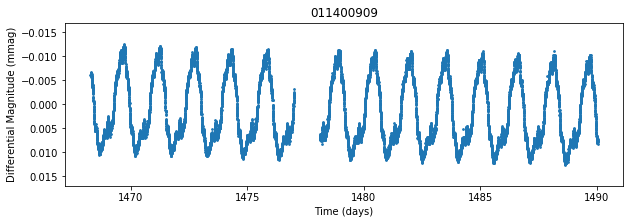

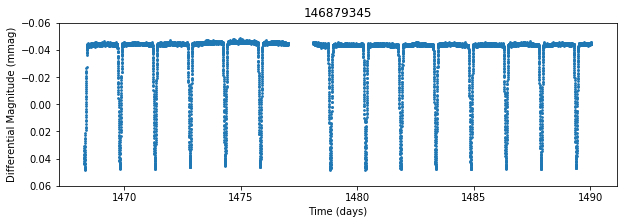

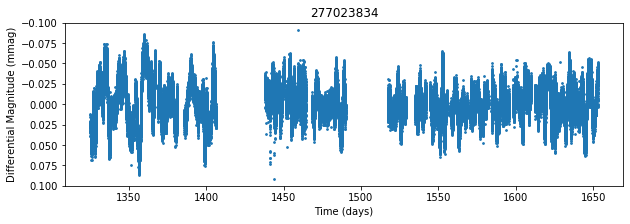

In [8]:
star1.plot("Time (days)", "Differential Magnitude (mmag)", kind = 'scatter', 
          legend = False, s = 3, ylim = [0.017, -0.017], figsize = (10,3),
          title = "011400909");

star2.plot("Time (days)", "Differential Magnitude (mmag)", kind = 'scatter', 
          legend = False, s = 3, ylim = [0.06, -0.06], figsize = (10, 3),
          title = "146879345");

star3.plot("Time (days)", "Differential Magnitude (mmag)", kind = 'scatter', 
          legend = False, s = 3, ylim = [0.1, -0.1], figsize = (10, 3),
          title = "277023834");

The light curve of the three stars. 

Now that you have plotted each time series, you can probably make an educated guess as to what type of variability (periodic, cyclical or stochastic) is present in each of them. Add a text cell below to put your best "guess" (prediction required for full marks, even if it is wrong or disagrees with answer later in the assignment).

011400909: Periodic

146879345: Cyclic

277023834: Stochastic

# **Computing Lomb-Scargle periodograms for each time series**

Using the package loaded above (LombScargle), compute the periodogram (either the power spectrum or the amplitude spectrum, as discussed in class) for each time series, and then plot each periodogram, making sure to properly label the axes and to identify each star. Make sure to choose the frequency range wisely.

For more documentation on the LombScargle package: https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle

For the normalization, make sure to use "psd" so that we can recover units.

In [0]:
LS1 = LombScargle(star1["Time (days)"], star1["Differential Magnitude (mmag)"], normalization = 'psd')
LS2 = LombScargle(star2["Time (days)"], star2["Differential Magnitude (mmag)"], normalization = 'psd')
LS3 = LombScargle(star3["Time (days)"], star3["Differential Magnitude (mmag)"], normalization = 'psd')

In [0]:
freq1, power1 = LS1.autopower(normalization = 'psd', nyquist_factor = 0.2)
amp1 = 2*(power1/len(star1["Time (days)"]))**0.5

freq2, power2 = LS2.autopower(normalization = 'psd', nyquist_factor = 0.2)
amp2 = 2*(power2/len(star2["Time (days)"]))**0.5

freq3, power3 = LS3.autopower(normalization = 'psd', nyquist_factor = 0.2)
amp3 = 2*(power3/len(star3["Time (days)"]))**0.5

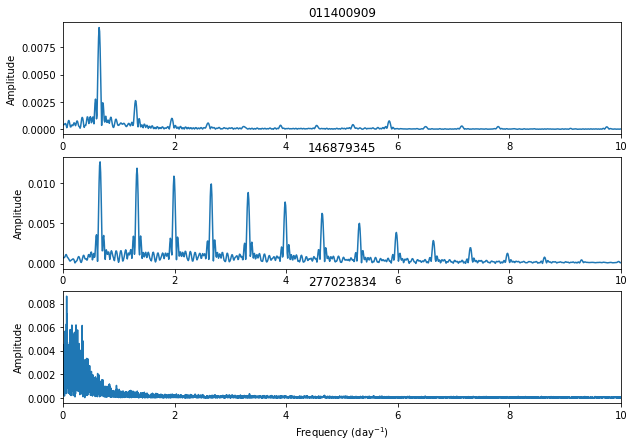

In [11]:
fig = plt.figure(figsize = (10, 7))
plt.subplot(3,1,1)
plt.plot(freq1, amp1)
plt.xlim([0, 10])
plt.xlabel(r"Frequency (day$^{-1}$)")
plt.ylabel("Amplitude")
plt.title("011400909")

plt.subplot(3,1,2)
plt.plot(freq2, amp2)
plt.xlim([0, 10])
plt.xlabel(r"Frequency (day$^{-1}$)")
plt.ylabel("Amplitude")
plt.title("146879345")

plt.subplot(3,1,3)
plt.plot(freq3, amp3)
plt.xlim([0, 10])
plt.xlabel(r"Frequency (day$^{-1}$)")
plt.ylabel("Amplitude")
plt.title("277023834");

Periodograms of the three stars.

Based on the periodograms you have plotted, add a text box below and indicate what type of variability is exhibited by each of the stars. If one of the stars exhibits *periodic* variations, please also indicate the value of that period.

In [12]:
freqMax = freq1[np.argmax(power1)]
period = 1/freqMax
print("Period of Periodic Time Series: {0:.3f}".format(period))

Period of Periodic Time Series: 1.544


011400909: Periodic - T = 1.544 days

146879345: Cyclic

277023834: Stochastic

# **Phase folding**

For any star above exhibiting periodic variations, you will phase-fold their time series. This is accomplished by rescaling the exogenous variable, dividing it by the period (keep in mind that period = 1/frequency, and that if you have multiple periods, or harmonics, you should divide by the fundamental period). However, only the fractional part (e.g. np.modf(x)[0]) of the period must be considered (which means that the axis containing the exogenous variable will no longer be monotonically increasing; therefore, make sure to reorder the dataset appropriately).

Then, plot the phase-folded light curve(s) and identify them accordingly.

In [0]:
phase, _ = np.modf((star1["Time (days)"] - star1["Time (days)"][0])/period)
phaseArgSort = np.argsort(phase)
phase = phase[phaseArgSort]
phasedY = star1["Differential Magnitude (mmag)"][phaseArgSort]

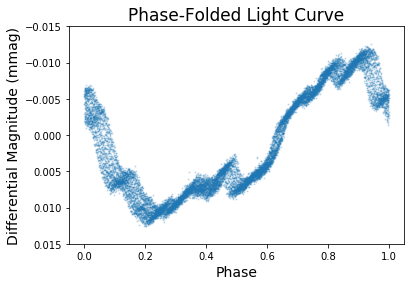

In [14]:
plt.plot(phase, phasedY, '.', ms = 2, alpha = 0.2)
plt.ylabel("Differential Magnitude (mmag)", size = 14)
plt.xlabel("Phase", size = 14)
plt.title("Phase-Folded Light Curve", size = 17)
plt.ylim([0.015, -0.015]);

Phase-folded light curve for star 011400909 showing periodicity. It seems like the period changes over time or slightly miscalculated as a phase shift is evident.

# **Binning**

Finally, you will bin the data so that the phased light curve(s) contains 20 bins (from 0 to 1). To do so, you can use the df.resample() method (or any other method you wish), averaging all the points within each bin. Overplot the binned light curve(s) over the original data using a larger symbol size (and perhaps a different color), and connect the binned points with a line. Are 20 bins appropriate? If not, add more bins and explain why.

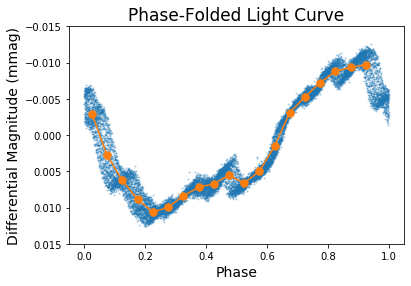

In [15]:
binNum = 20;
binLbl = pd.cut(phase, bins = binNum, labels = False)

phaseBin= []
for i in range (0, binNum - 1):
  phaseBin.append(np.median(phase[binLbl == i]))

yBin= []
for i in range (0, binNum - 1):
  yBin.append(np.mean(phasedY[binLbl == i]))

plt.plot(phase, phasedY, '.', ms = 2, alpha = 0.3)
plt.plot(phaseBin, yBin, '.-', ms = 15)
plt.ylabel("Differential Magnitude (mmag)", size = 14)
plt.xlabel("Phase", size = 14)
plt.title("Phase-Folded Light Curve", size = 17)
plt.ylim([0.015, -0.015]);

Phase-folded light curve for star 011400909 showing periodicity and the plot of the binned values as a series of connected points. There are 20 bins, with the average differential magnitude and median phase being plotted. The binning helps to reduce the effect of the drifting period. It seems that 20 bins is not enough for this curve as the features of the data, such as the jagged edges, are not captured well.

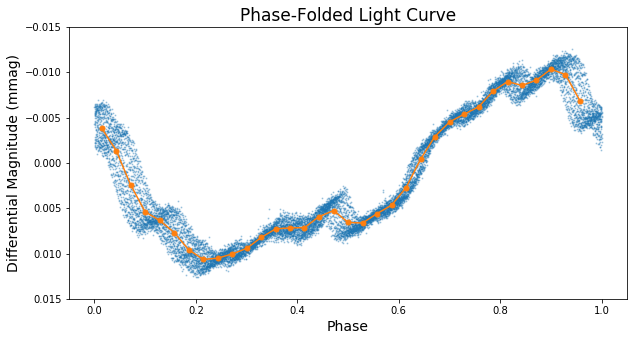

In [16]:
binNum = 35;
binLbl = pd.cut(phase, bins = binNum, labels = False)

phaseBin= []
for i in range (0, binNum - 1):
  phaseBin.append(np.median(phase[binLbl == i]))

yBin= []
for i in range (0, binNum - 1):
  yBin.append(np.mean(phasedY[binLbl == i]))

plt.figure(figsize = (10,5))
plt.plot(phase, phasedY, '.', ms = 2, alpha = 0.3)
plt.plot(phaseBin, yBin, '.-', ms = 10)
plt.ylabel("Differential Magnitude (mmag)", size = 14)
plt.xlabel("Phase", size = 14)
plt.title("Phase-Folded Light Curve", size = 17)
plt.ylim([0.015, -0.015]);

The phase-folded light curve with the binned data but with 35 bins. This seems to do a much better job at fathfully producing the essential features of the data.

This concludes the homework assignment!

**Bonus question**: The resulting phase-folded light curve(s) might not be perfectly overlapping, with certain artefacts. Adding a text cell below, comment on what method could help address that issue, and summarily describe how you would go about applying it.